In [6]:
import pandas as pd
import numpy as np
import plotnine   # R에 있는 ggplot 사용할 수 있는 패키지
from plotnine import *
import os, sys, gc
#from tqdm.notebook import tqdm

In [7]:
path = '../data/books/'

In [8]:
books = pd.read_csv(path + "books.csv")             # 책의 메타 정보
book_tags = pd.read_csv(path + "book_tags.csv")     # 책-태그의 매핑 정보
ratings = pd.read_csv(path + "ratings.csv")         # 사용자가 책에 대해 점수를 준 평점정보
tags = pd.read_csv(path + "tags.csv")               # 태그의 정보
to_read = pd.read_csv(path + "to_read.csv")         # 사용자가 읽으려고 기록해둔 책 (장바구니)

In [9]:
books.head()

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\Minji\Anaconda3\lib\site-packages\pandas\io\common.py)

   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Ph

In [10]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [11]:
books['small_image_url'].values[0]
# 책같은 경우에는 표지의 영향을 많이 받아서, 
# 표지에서 특징을 추출하고 CNN 모델로 유사한 책을 찾는 Contents Based Recommendation도 가능

'https://images.gr-assets.com/books/1447303603s/2767052.jpg'

In [12]:
# 필요한 변수들만 사용 
books = books[['book_id', 'authors', 'title', 'ratings_count', 'average_rating', 'language_code']].reset_index(drop=True)

In [13]:
agg = books.groupby('authors')['authors'].agg({'count'})
(ggplot(data = agg)
  + geom_histogram(aes(x='count'), binwidth = 1, fill = '#49beb7')
  + labs(title = "Number of the Author's Book",
         x = 'Book Count',
         y = 'Author Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

ImportError: cannot import name 'ABCNDFrame' from 'pandas.core.dtypes.generic' (C:\Users\Minji\Anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

In [10]:
print("책의 숫자:", books['book_id'].nunique())
print("저자의 숫자:", books['authors'].nunique(), "\n")
print(pd.DataFrame(agg['count'].describe()).T)

책의 숫자: 10000
저자의 숫자: 4664 

        count      mean       std  min  25%  50%  75%   max
count  4664.0  2.144082  3.414442  1.0  1.0  1.0  2.0  60.0


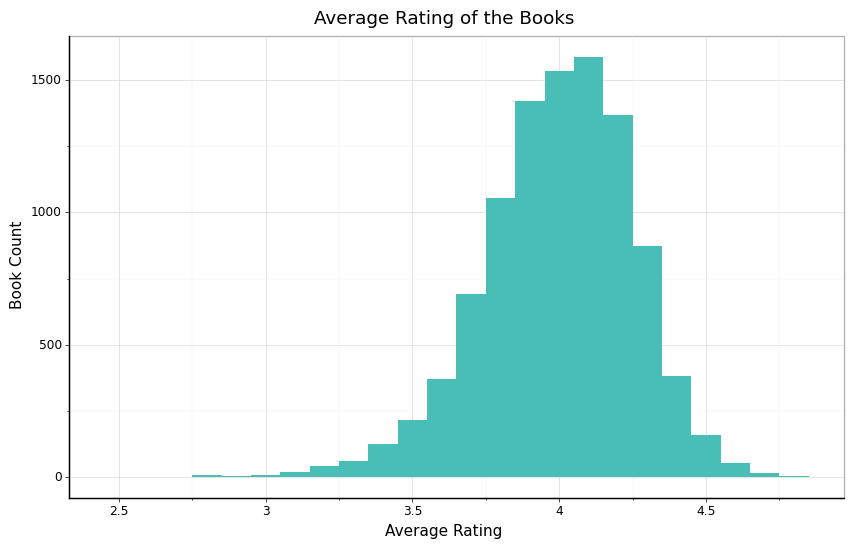

<ggplot: (159728104665)>

In [11]:
(ggplot(data = books)
  + geom_histogram(aes(x='average_rating'), binwidth = 0.1, fill = '#49beb7')
  + labs(title = "Average Rating of the Books",
         x = 'Average Rating',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [12]:
books[books['average_rating'] <= 3].shape[0]

14

In [13]:
books.sort_values(by='average_rating', ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,28900,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,9081,4.76,en-US
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,8953,4.76,eng
